In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import PercentFormatter

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price

''

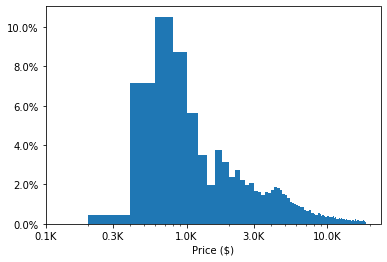

In [10]:
# univariate plot of diamond prices
new_bins = np.arange(0,max(diamonds.price)+200,200)
x_ticks = [100,300,1000,3000,10000]
x_labels = [str(i/1000)+'K' for i in x_ticks]
plt.hist(diamonds.price,bins = new_bins,weights=np.ones(len(diamonds.price)) / len(diamonds.price))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Price ($)')
plt.xscale('log')
plt.xticks(x_ticks,x_labels)
;

Price distribution comment 1: 
The histogram shows that the diamond price is highly right skewed. It is quite obvious that more than 40% of the diamonds are worth less tha 1000 dollar.

There is a little peak when price is about 4K.

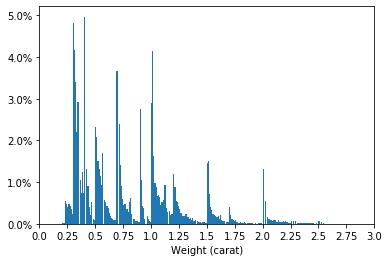

In [27]:
# univariate plot of carat weights
new_bins = np.arange(0,max(diamonds.carat)+0.01,0.01)
x_ticks = np.arange(0,max(diamonds.carat),0.25)
plt.hist(diamonds.carat,new_bins,weights=np.ones(len(diamonds.carat)) / len(diamonds.carat))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Weight (carat)')
plt.xticks(x_ticks,x_ticks)
plt.xlim(0,3);

Carat distribution comment:

There is an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size convention.

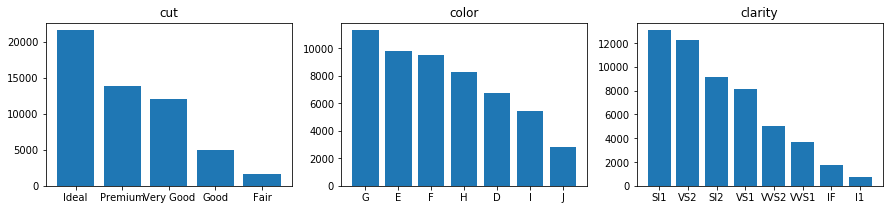

In [24]:
# univariate plots of cut, color, and clarity grades
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
labels = ['cut','color','clarity']
three_C = diamonds[labels]
for i in range(0,3):
    names = tuple(three_C.iloc[:,i].value_counts().index)
    values = tuple(three_C.iloc[:,i].value_counts().values)

    axs[i].bar(names,values)
    axs[i].title.set_text(labels[i])
    ;

Cut distribution comment: The bar chart shows that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.

Color distribution comment: The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)

Clarity distribution comment: There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).

# Bivariate Exploration

After a decent investigation on the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, we construct a plot of the price against carat weight. 

In [28]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

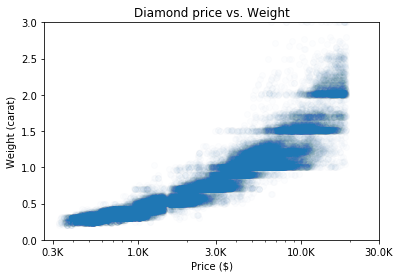

In [31]:
# bivariate plot of price vs. carat
x_bins = [300,1000,3000,10000,30000]
x_labels = [str(i/1000)+'K' for i in x_bins]
plt.scatter(data = diamonds,x= 'price',y='carat',alpha = 0.01)
plt.ylim(0,3)
plt.xlabel('Price ($)')
plt.ylabel('Weight (carat)')
plt.xscale('log')
plt.xticks(x_bins,x_labels)
plt.title('Diamond price vs. Weight');

Price vs. Carat comment: The transformation has changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend, wouldn't it? It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.

Price vs. Carat comment 2: After transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.